В этом занятии:
* Познакомимся с линейной регрессией.

* Узнаем о существовании других видов регрессионных моделей.

* Научимся оценивать размер ошибки в модели с помощью метода наименьших квадратов.

* Разберемся с понятием метрики и научимся считать MAE, MSE и RMSE.

* [Бонус] Поговорим о том, как экспортировать модели.

___

# 1. Простая линейная регрессия

В данном примере мы построим простую линию тренда, используя классическое уравнение $y=mx+b$.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Данные

Мы воспользуемся данными из книги ISLR (Introduction to Statistical Learning: With Applications in R), где рассматриваются продажи товара (измеряемые в тысячах единиц) в зависимости от рекламного бюджета на ТВ, радио и в газетах (измеряемого в тысячах долларов).

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Давайте подумаем, **есть ли связь между *общими* расходами на рекламу и *продажами*?**

Интуиция и опыт говорят, что есть: чем больше инвестируем в рекламу, тем больше продаж. Но проверить это на реальных данных не помешает:

In [4]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspaper']

In [5]:
df['total_spend']

0      337.1
1      128.9
2      132.4
3      251.3
4      250.0
       ...  
195     55.7
196    107.2
197    192.7
198    391.8
199    249.4
Name: total_spend, Length: 200, dtype: float64

<Axes: xlabel='total_spend', ylabel='sales'>

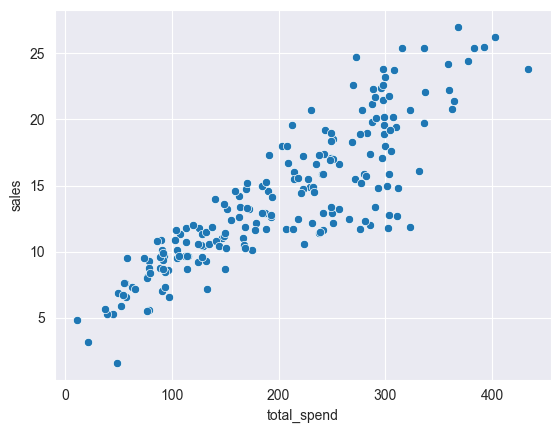

In [6]:
sns.scatterplot(x='total_spend',y='sales',data=df)

Интуиция нас не подвела: взаимосвязь линейная. А потому наше предположение верно:)

При этом все точки распределения образуют некоторую линию, которая отражает взаимосвязь между продажами и бюджетом на рекламную компанию. Осталось понять, как применить ее к практическим задачам.

## [Линия наименьших квадратов](https://ru.wikipedia.org/wiki/%D0%9B%D0%B8%D0%BD%D0%B5%D0%B9%D0%BD%D0%B0%D1%8F_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%81%D0%B8%D1%8F)

**На какой вопрос отвечает линия тренда?**

Какие продажи можно ожидать при затратах на рекламу в размере $200? Построим модель, которая будет предсказывать объем продаж основываясь на матрице признаков. Упростим постановку задачи и объединим все факторы, влияющие на продажи, в один параметр "общие затраты на рекламу".

**В рамках следующей рекламной кампании мы планируем затратить всего $200. Какое количество товара будет продано?**

<Axes: xlabel='total_spend', ylabel='sales'>

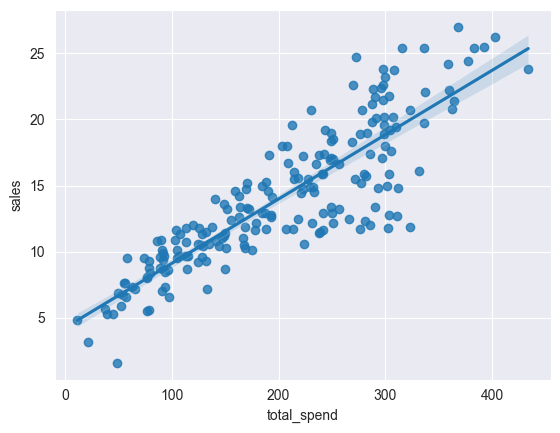

In [7]:
# По сути мы хотим выяснить, как мы можем нарисовать вот такую линию (которую рисует regplot)
sns.regplot(x='total_spend',y='sales',data=df)

Для этого нам нужно решить следующее уравнение: $$y=mx+b$$


$$ \hat{y} = \beta_0 + \beta_1X$$

У нас есть вектор продаж $y$ и матрица расходов на рекламу $X$. Так как мы объединили все факторы в общий параметр "общие затраты на рекламу", $X$ является матрицей, состоящей из одного столбца, то есть вектором. Неизвестные параметры $\beta_1$ и $\beta_0$ задают зависимость между $X$ и $y$. Здесь символ *^* над $\hat{y}$ обозначает, что $\hat{y}$ -- это прогнозное (оценочное) значение продаж, в то время как $y$ представляет собой истинное значение, которое известно для некоторых точек.

Для решения этого уравнения мы можем использовать библиотеку `NumPy` (вы также можете решить уравнение вручную, если желаете). Для этого мы можем взять метод [`np.polyfit`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)


In [8]:
X = df['total_spend']
y = df['sales']

Вызовем справку по методу

In [9]:
help(np.polyfit)

Help on _ArrayFunctionDispatcher in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y 

In [10]:
# Сначала возвращаются коэффициенты более высоких порядков (степеней полинома)!
np.polyfit(X,y,1)

array([0.04868788, 4.24302822])

In [11]:
# Потенциальные расходы бюджета в будущем
potential_spend = np.linspace(0,500,100)


Выведем предсказание по продажам, подставив полученные коэффициенты в уравнение $$y=mx+b$$

In [12]:
predicted_sales =  0.04868788*potential_spend + 4.24302822

Построим полученную закономерность:

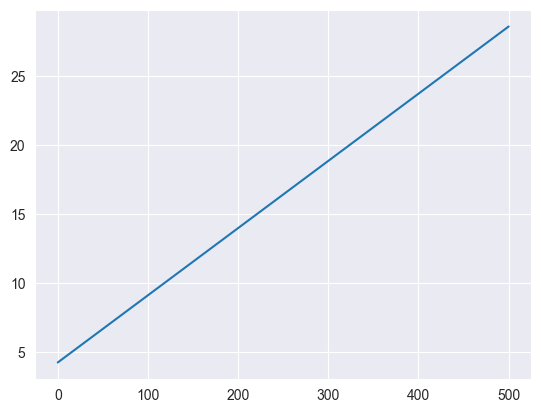

In [13]:
plt.plot(potential_spend,predicted_sales)

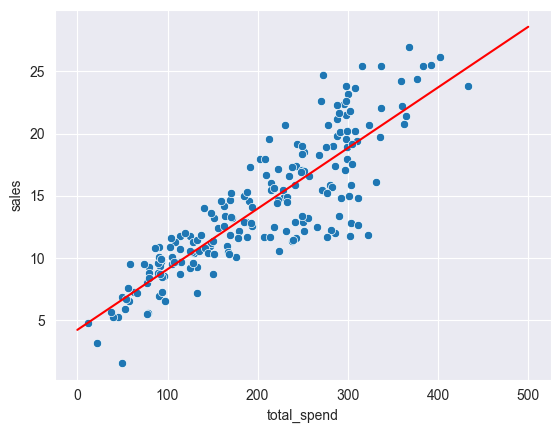

In [14]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

Вернемся к изначальному вопросу

**В следующей рекламной кампании мы планируем всего потратить $200. Сколько единиц товара мы ожидаем продать благодаря этой рекламе?**


In [15]:
spend = 200
predicted_sales =  0.04868788*spend + 4.24302822

In [16]:
predicted_sales

13.98060422

# А если использовать не линию, а более сложную зависимость?


Обратите внимание, что в функции `np.polyfit` мы использовали значение `order=1`, то есть прямую линию. При желании мы можем применить полиномы более высоких порядков, но станет ли предсказание лучше? Бывают ли ситуации, когда мы слишком хорошо обучили модель? Или слишком плохо? Как мы можем это узнать, и как вообще определить, хорошо или плохо выполнено обучение?

### **[Задание 1]**

Проверьте эту гипотезу. Выведите результат функции `np.polyfit` для `order=3`

In [17]:
np.polyfit(X,y,3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [18]:
a = 3.076150
b = -1.893924
c = 8.208863
d = 2.704951

Теперь полученные коэффициенты используем для построения полинома, описывающего зависимость стоимости товаров от бюджета на рекламную кампанию.

In [19]:
# Потенциальные расходы бюджета в будущем
potential_spend = np.linspace(0,500,100)

### **[Задание 2]**

Составьте полином `predicted_sales` из коэффициентов, полученных вами в предыдущем задании. В качестве переменной используйте `potential_spend`

In [20]:
predicted_sales = a * potential_spend**3 + b * potential_spend**2 + c * potential_spend + d

Построим полученную зависимость и изначальное распределение точек:

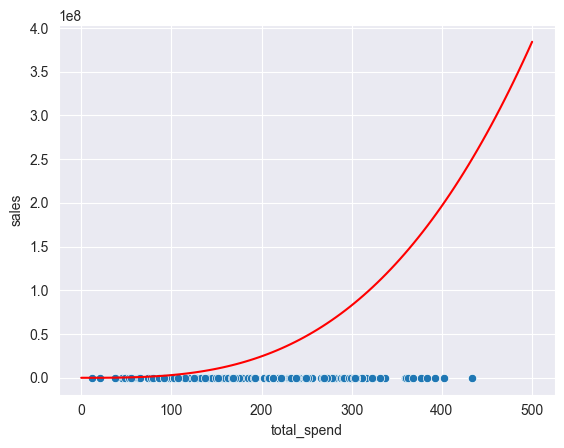

In [21]:
sns.scatterplot(x='total_spend',y='sales',data=df)
plt.plot(potential_spend,predicted_sales,color='red')

### **[Задание 3]**

Эта кривая лучше или хуже прямой линии? Каким образом мы можем это измерить?

Ниже мы познакомимся со способами оценки качества, а пока мы просим вас порассуждать о том, насколько точной получилась модель

## Несколько признаков

В исходных данных есть 3 признака, а не только общие расходы на рекламу. Сможем ли мы повторить процесс и получить более точные результаты? Давайте попробуем использовать тот же подход, что и раньше

In [22]:
X = df[['TV','radio','newspaper']]
y = df['sales']

In [23]:
# Здесь мы передаём в массиве X три отдельных признака, но, к сожалению, это приведет к ошибке
np.polyfit(X,y,1)

TypeError: expected 1D vector for x

**Ну вот... Polyfit работает только с одномерным массивом X! Нам нужно переходить к более мощной библиотеке...**

# Линейная регрессия в SciKit-Learn

Ранее мы видели, как можно построить простую линию тренда. Теперь мы значительно расширим спектр наших знаний — поговорим об оценке модели, а также об использовании нескольких признаков!

### Постановка вопроса

Раньше мы искали ответ на вопрос "**Есть ли связь между общими расходами на рекламу и продажами?**", а также пытались предсказывать продажи на основе заданного значения общего бюджета на рекламу. Теперь давайте зададим более широкий вопрос - **Какова связь между каналами рекламы (ТВ, радио, газеты) и продажами?**.

Таким образом нам нужна модель, которая справляется с несколькими признаками.

### Несколько признаков (N-мерное пространство)

Ранее мы попробовали работать с `np.polyfit`, однако, он не справляется с несколькими фичами. Попробуем решить проблемы с этим с помощью другого подхода.

Исследуем влияние формата рекламной кампании (тв, радио, новости) на продажи.
Выберем несколько столбцов датасета: `Radio`, `TV`, `Newspaper`. Построим зависимости продаж от каждой из этой характеристик по отдельности.

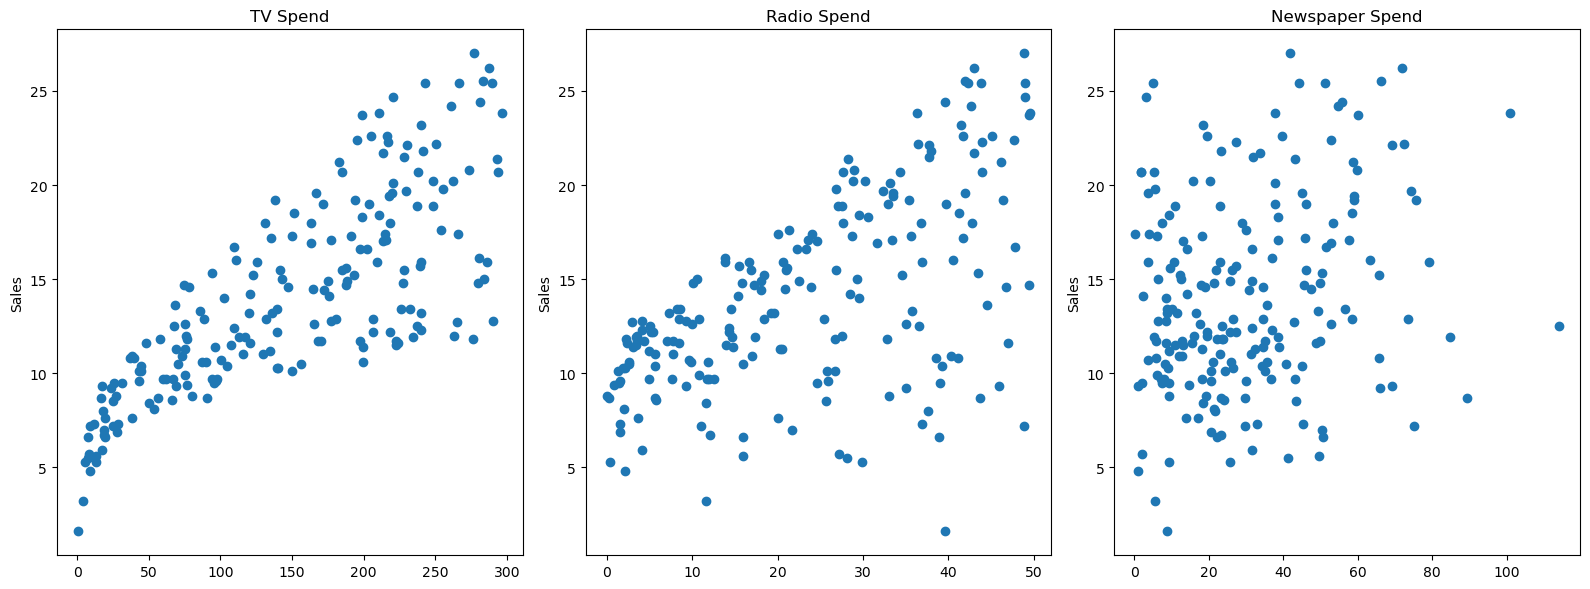

In [ ]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

Теперь исследуем зависимости и взаимосвязи между признаками через [`sns.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

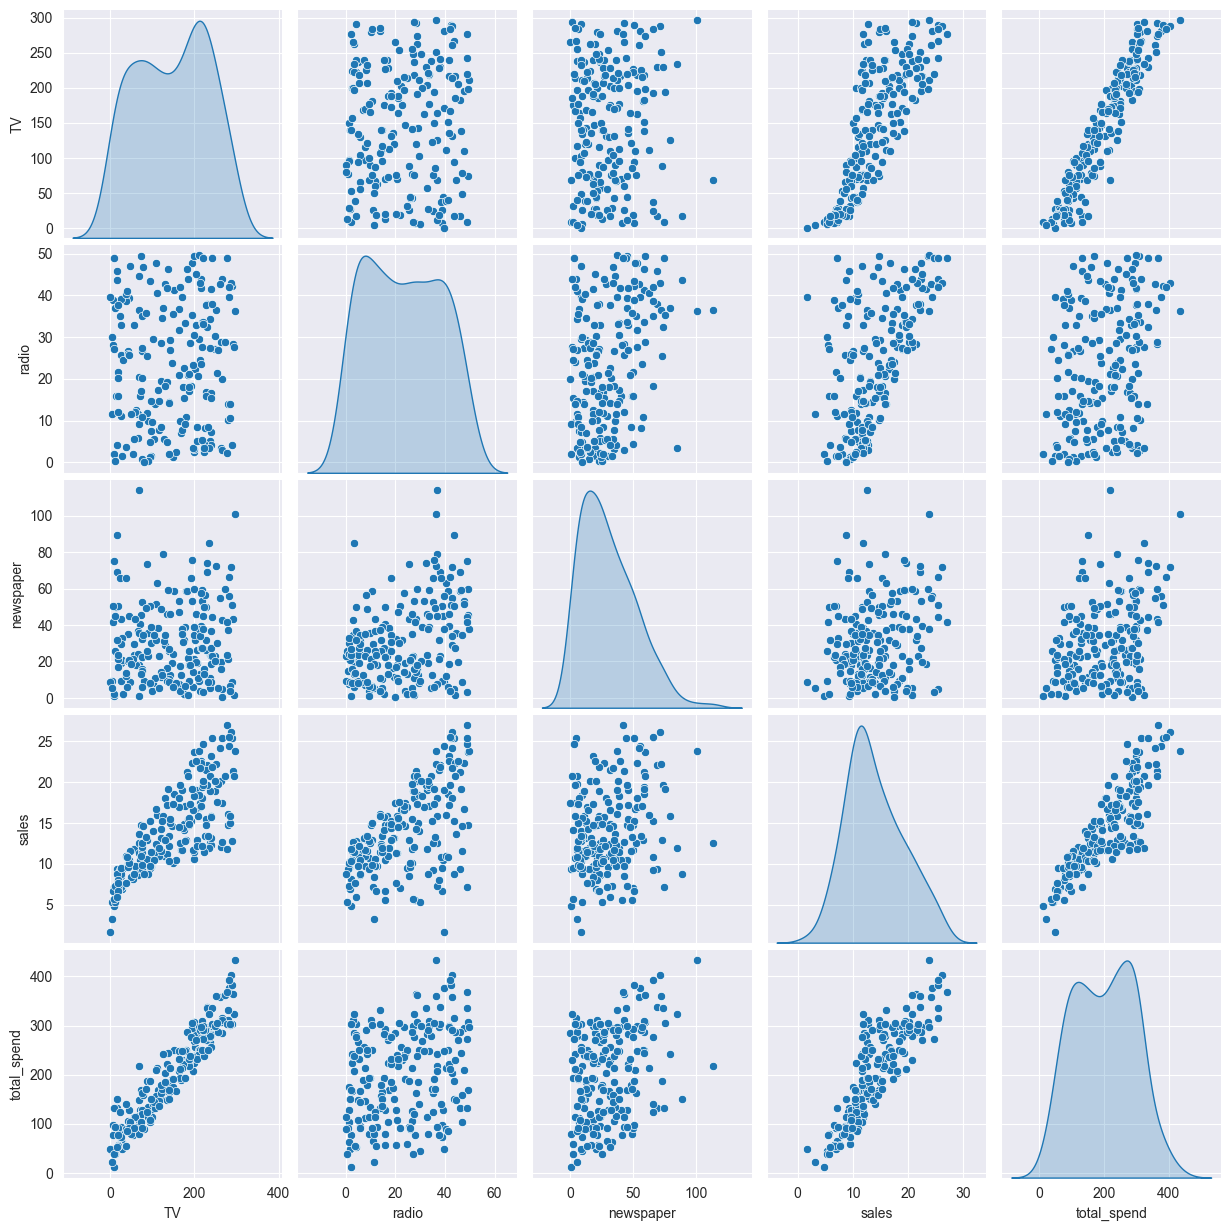

In [24]:
sns.pairplot(df,diag_kind='kde')

Что вы можете сказать, после построения этих графиков? Как связаны продажи с различными каналами продвижения?

## Введение в SciKit Learn

Мы будем очень много работать с библиотекой [`scitkit learn`](https://scikit-learn.org/stable/), так что приготовьтесь работать с синтаксисом `model estimator`, а также почитайте документацию по этой библиотеке.

Разделим наш датасет на две части: в одну из них `Х` положим датасет без столбца с объемами продаж, а во второй `y` — только продажи.

In [ ]:
X = df.drop('sales',axis=1)
y = df['sales']

## Разбиение на обучающую и тестовую выборки

Деление выборки на обучающую (train), тестовую (test) и валидационную(validation) служит для оценки и проверки качества модели машинного обучения.

**Обучающая выборка** используется для обучения модели. Модель настраивается на этих данных, чтобы научиться предсказывать правильный ответ.

**Тестовая выборка** используется для оценки качества обученной модели. Она не участвует в процессе обучения, но используется для проверки того, насколько наша модель правильно предсказывает ответы.

**Валидационная выборка** используется для настройки гиперпараметров модели. *Гиперпараметры* — это параметры модели, которые не могут быть изучены в процессе обучения, и их значения нужно задать снаружи. Валидационная выборка помогает выбрать оптимальные значения гиперпараметров, чтобы улучшить качество модели.

Используем `scikit-learn` для деления нашей выборки на `train` и `test` c помощью метода `train_test_split`



In [25]:
from sklearn.model_selection import train_test_split

In [26]:
# random_state:
# https://stackoverflow.com/questions/28064634/random-state-pseudo-random-number-in-scikit-learn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
X_train

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8
...,...,...,...
63,102.7,29.6,8.4
70,199.1,30.6,38.7
81,239.8,4.1,36.9
11,214.7,24.0,4.0


In [28]:
y_train

85     15.2
183    26.2
127     8.8
53     21.2
100    11.7
       ... 
63     14.0
70     18.3
81     12.3
11     17.4
95     16.9
Name: sales, Length: 140, dtype: float64

In [29]:
X_test

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


In [30]:
y_test

37     14.7
109    19.8
31     11.9
89     16.7
66      9.5
119     6.6
54     20.2
74     17.0
145    10.3
142    20.1
148    10.9
112    14.1
174    11.5
55     23.7
141    19.2
149    10.1
25     12.0
34      9.5
170     8.4
39     21.5
172     7.6
153    19.0
175    27.0
61     24.2
65      9.3
50     11.4
42     20.7
129     9.7
179    12.6
2       9.3
12      9.2
133    19.6
90     11.2
22      5.6
41     17.1
32      9.6
125    10.6
196     9.7
158     7.3
180    10.5
16     12.5
186    10.3
144    11.4
121     7.0
80     11.8
18     11.3
78      5.3
48     14.8
4      12.9
15     22.4
1      10.4
43     12.9
102    14.8
164    11.9
9      10.6
155     3.2
36     25.4
190    10.8
33     17.4
45     14.9
Name: sales, dtype: float64

## Создаём модель

#### Импортируем класс модели

Мы импортируем модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html), которую будем обучать

In [31]:
from sklearn.linear_model import LinearRegression

Вызовем справку по модели:

In [ ]:
help(LinearRegression)

#### Создаём экземпляр модели с параметрами

Инициализируем нашу модель:

In [32]:
model = LinearRegression()

### Выполняем обучение (Fit/Train) модели

**Напоминаем: Обучение следует проводить не на всех данных, а только на обучающих.**

In [33]:
model.fit(X_train,y_train)

LinearRegression()

# Детали работы модели

-----

## Оценка работы модели на тестовых данных

### Метрики

Для регрессионных задач наиболее часто используются следующие три метрики:

**Средняя абсолютная ошибка — Mean Absolute Error** (MAE) — усредняет абсолютные значения ошибок:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Среднеквадратическая ошибка — Mean Squared Error** (MSE) — усредняет квадраты ошибок:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Среднеквадратическое отклонение — Root Mean Squared Error** (RMSE) — квадратный корень от среднеквадратической ошибки:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Сравнение метрик:

- **MAE** проще всего понять - это просто средняя ошибка.
- **MSE** популярнее MAE, потому что MSE больше "наказывает" большие ошибки, а  это полезно в прикладных задачах.
- **RMSE** даже ещё более популярна, чем MSE, потому что RMSE измеряется в тех же единицах, что и *y*.

Все эти метрики называются **функциями потерь (loss functions)**.

### Вычисляем производительность модели на тестовых данных

**Напоминаем: Чтобы корректно оценить работу модели, мы вычисляем метрики на тестовом наборе данных (это те данные, которые модель никогда не видела в процессе обучения).**


In [34]:
X_test

,TV,radio,newspaper
37,74.7,49.4,45.7
109,255.4,26.9,5.5
31,112.9,17.4,38.6
89,109.8,47.8,51.4
66,31.5,24.6,2.2
119,19.4,16.0,22.3
54,262.7,28.8,15.9
74,213.4,24.6,13.1
145,140.3,1.9,9.0
142,220.5,33.2,37.9


In [35]:
# Мы передаём только тестовые данные
# Модель делает предсказания - значения y с крышкой
# Теперь мы можем сравнить предсказанные значения с известными нам истинными значениями y
test_predictions = model.predict(X_test)

In [36]:
test_predictions

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [37]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [38]:
MAE = mean_absolute_error(y_test,test_predictions)

In [39]:
MAE

1.2137457736144803

### **[Задание 4]**

Вычислите MSE для тестовых данных

In [40]:
MSE = mean_squared_error(y_test, test_predictions)

In [41]:
MSE

2.2987166978863773

### **[Задание 5]**

Вычислите RMSE для тестовых данных

In [44]:
# RMSE = np.sqrt(mean_squared_error(y_test, test_predictions))
RMSE = mean_squared_error(y_test, test_predictions, squared=False)

In [45]:
RMSE

1.5161519375993877

### **[Задание 6]**

Подумайте, являются ли данные значения метрик оптимальными? Можно ли отдать предпочтение одной метрике? Или нельзя и каждую из них нужно исследовать в совокупности?

-----------

## Повторное обучение модели на полных данных

Если мы довольны работой модели на тестовых данных, то прежде чем передавать модель в эксплуатацию, мы можем выполнить обучение модели на всем датасете. (Если же мы не довольны работой модели на тестовых данных, то мы можем поменять значения параметров или вообще выбрать другую модель - позже мы обсудим это более подробно).

In [46]:
final_model = LinearRegression()

In [47]:
final_model.fit(X,y)

LinearRegression()

Обратите внимание, что здесь уже не имеет смысл заново считать метрику RMSE. Дело в том, что теперь модель увидела все данные, и метрика RMSE уже не будет хорошей оценкой производительности модели, как это было в случае с тестовыми данными.

## Аттрибуты модели

### Финальная модель

Построим финальные графики для нашей модели.

In [48]:
y_hat = final_model.predict(X)

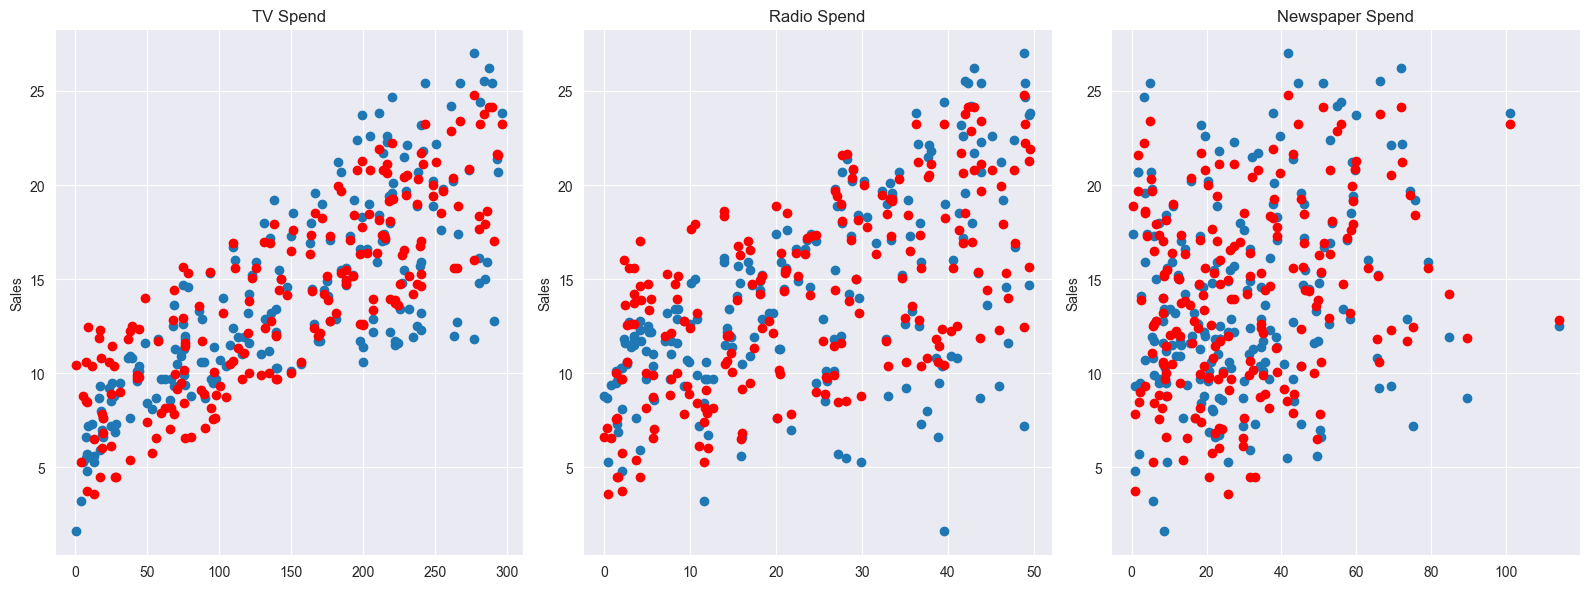

In [49]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))

axes[0].plot(df['TV'],df['sales'],'o')
axes[0].plot(df['TV'],y_hat,'o',color='red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].plot(df['radio'],y_hat,'o',color='red')
axes[1].set_title("Radio Spend")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].plot(df['newspaper'],y_hat,'o',color='red')
axes[2].set_title("Newspaper Spend");
axes[2].set_ylabel("Sales")
plt.tight_layout();

### Коэффициенты

Получим коэффициенты для нашей модели и запишем их в `DataFrame`.

In [50]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [51]:
coeff_df = pd.DataFrame(final_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
TV,0.045765
radio,0.188530
newspaper,-0.001037


Интерпретация коэффициентов:

---
* Когда все другие признаки зафиксированы, то увеличение на 1 "единицу" (на тысячу долларов) признака TV Spend приведёт к увеличению продаж на 0.045 "единиц продаж", в данном случае тысячи единиц.
* По сути это означает, что на каждые $1000, потраченные на рекламу TV, мы можем ожидать продажи дополнительных 45 единиц товара.
----

---
* Когда все другие признаки зафиксированы, то увеличение на 1 "единицу" (на тысячу долларов) признака Radio Spend приведёт к увеличению продаж на 0.188  "единиц продаж", в данном случае тысячи единиц.
* По сути это означает, что на каждые $1000, потраченные на рекламу Radio, мы можем ожидать продажи дополнительных 188 единиц товара.
----

---
* Когда все другие признаки зафиксированы, то увеличение на 1 "единицу" (на тысячу долларов) признака Newspaper Spend приведёт к **уменьшению** продаж на 0.001 "единиц продаж", в данном случае тысячи единиц.
* По сути это означает, что на каждые $1000, потраченные на рекламу Newspaper Ads, мы на самом деле ожидаем продать на 1 товар меньше. Поскольку эта цифра так близка к нулю, по сути это означает, что реклама в газетах практически не влияет на продажи.
---

**Обратите внимание! В данном примере единицы измерения одинаковы для всех признаков (1 единица измерения равна $1000 рекламного бюджета). Однако в других наборах данных, разные признаки могут иметь разные единицы измерения.**

In [52]:
df.corr()

,TV,radio,newspaper,sales,total_spend
TV,1.000000,0.054809,0.056648,0.782224,0.945330
radio,0.054809,1.000000,0.354104,0.576223,0.293211
newspaper,0.056648,0.354104,1.000000,0.228299,0.343059
sales,0.782224,0.576223,0.228299,1.000000,0.867712
total_spend,0.945330,0.293211,0.343059,0.867712,1.000000


### Предсказания для новых данных

Вспомним, что `X_test` выглядит *в точности* так же, как и новые данные. Так что мы можем просто вызвать метод .predict() для предсказания продаж для новой рекламной кампании.

**В нашей следующей рекламной кампании мы планируем потратить 149k на рекламу на ТВ, 22k на рекламу по радио и 12k на рекламу в газетах. Сколько единиц товара мы ожидаем продать в результате такой рекламы?**

In [53]:
campaign = [[149,22,12]]

In [54]:
final_model.predict(campaign)

/Library/Python/3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

-----

## Сохранение и загрузка модели

А как запускать вашу прекрасную модель в продакшн?

Для этого нужно воспользоваться библиотекой [`joblib`](https://joblib.readthedocs.io/en/stable/), а именно ее методами [`dump`](https://joblib.readthedocs.io/en/stable/generated/joblib.dump.html) для выгрузки модели и [`load`](https://joblib.readthedocs.io/en/stable/generated/joblib.load.html).

Подключим нужные методы из библиотеки:

In [55]:
from joblib import dump, load

Выгрузим модель. Передадим `dump` два параметра: нашу модель и название файла для выгрузки (или путь до места сохранения файла)

In [56]:
dump(final_model, 'sales_model.joblib')

['sales_model.joblib']

Теперь модель сохранена в файле, который мы можем, например, передать нашим коллегам для деплоя:)

Если нам потребуется загрузить модель, то мы можем сделать это с помощью метода `load`, которому в качестве параметра передадим имя файла или путь до него в файловой системе. Загруженную модель передадим в объект `loaded_model`.

In [57]:
loaded_model = load('sales_model.joblib')

Загруженный объект теперь можно использовать для предсказаний.

In [58]:
loaded_model.predict(campaign)

/Library/Python/3.9/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

## Что дальше?...
### Можно ли как-то улучшить точность модели? Это всё ещё достаточно простая модель, так что давайте добавим дополнительные детали - посмотрим на регуляризацию!

Но это уже совсем другая история...


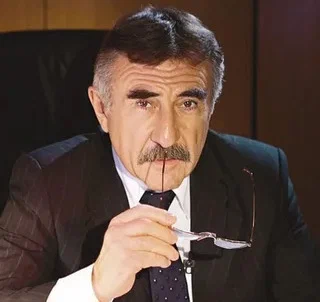